In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the dataset

In [2]:
df=pd.read_csv("breast-cancer-wisconsin.txt",delimiter=",")
all_labels=df.columns[2:-1].values.tolist()
print('Dimension of the train dataset: {}'.format(np.shape(df)))

Dimension of the train dataset: (15855, 12)


## Data processing

In [3]:
def noidea(x):
    return np.nan if x=='No idea' else x

def noalpha(s):
    import re
    return re.sub('[!@#$?]', '', str(s))

def tonan(s):
    return np.nan if str(s)=='' else s

def scaletoten(x):
    return x/10 if x>10 else x

def classmap(x):
    return 1 if x==4 else 0

df = df.applymap(noidea)
df.dropna(how='any', inplace=True)
df = df.applymap(noalpha)
df = df.applymap(tonan)
df.dropna(how='any', inplace=True)
df = df.apply(pd.to_numeric)
df.drop(columns=['Index'],inplace=True)
df.dropna(how='any', inplace=True)
df[all_labels+['Class']] = df[all_labels+['Class']].applymap(scaletoten)
df['Class'] = df['Class'].apply(classmap)
print('Dimension of the train dataset: {}'.format(np.shape(df)))

Dimension of the train dataset: (15760, 11)


## Check for missing values after cleaning

In [4]:
missing_df = df.columns[df.isna().any()].tolist()
print('Columns with missing value in train data: ',missing_df)

Columns with missing value in train data:  []


In [6]:
df.nunique()

ID                             650
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [7]:
df.dtypes

ID                               int64
Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                            int64
dtype: object

### EDA

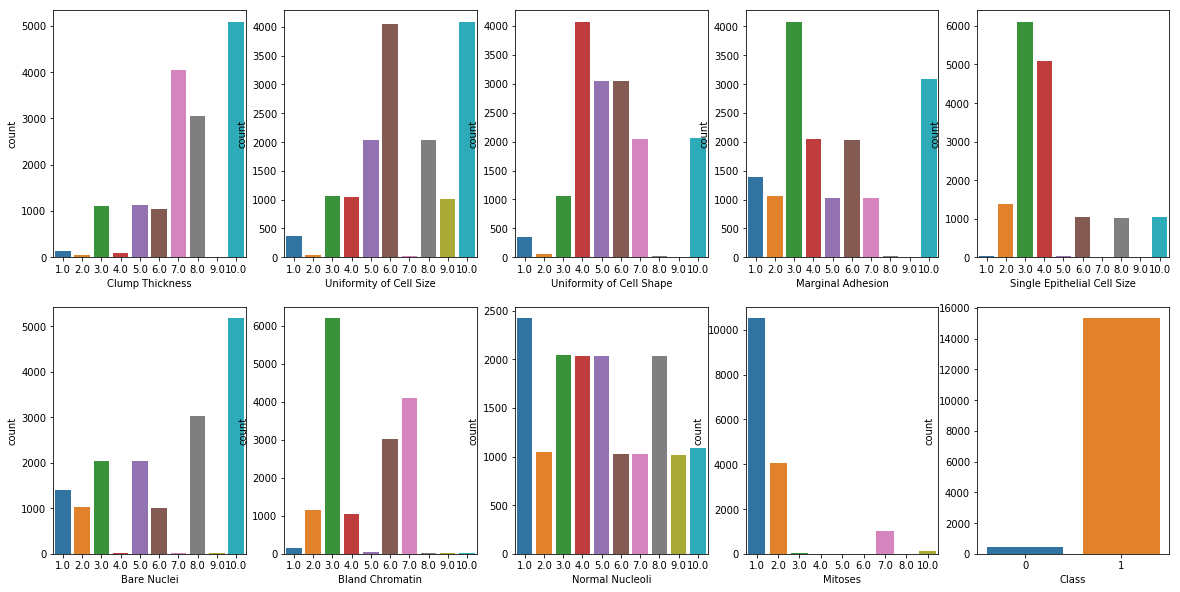

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
_ = sns.countplot(df['Clump Thickness']);
plt.subplot(2,5,2)
_ = sns.countplot(df['Uniformity of Cell Size']);
plt.subplot(2,5,3)
_ = sns.countplot(df['Uniformity of Cell Shape']);
plt.subplot(2,5,4)
_ = sns.countplot(df['Marginal Adhesion']);
plt.subplot(2,5,5)
_ = sns.countplot(df['Single Epithelial Cell Size']);
plt.subplot(2,5,6)
_ = sns.countplot(df['Bare Nuclei']);
plt.subplot(2,5,7)
_ = sns.countplot(df['Bland Chromatin']);
plt.subplot(2,5,8)
_ = sns.countplot(df['Normal Nucleoli']);
plt.subplot(2,5,9)
_ = sns.countplot(df['Mitoses']);
plt.subplot(2,5,10)
_ = sns.countplot(d#f['Class']);


## Looking for feature correlation

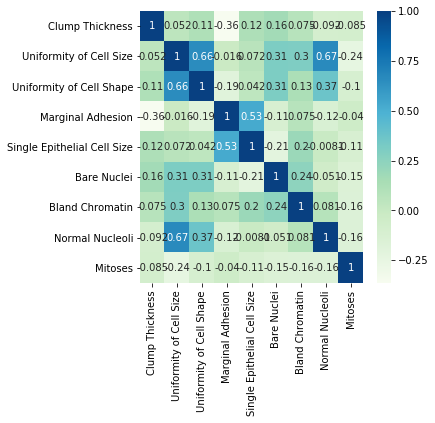

In [85]:
# fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
# fig.set_size_inches(8, 6)
sns.heatmap(df[all_labels].corr(),annot=True, cmap="GnBu");

## Split dataset for train and test

In [58]:
X = df[all_labels]
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace = True, drop = True);
X_test.reset_index(inplace = True, drop = True);
y_train.reset_index(inplace = True, drop = True);
y_test.reset_index(inplace = True, drop = True);
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 12608 samples.
Testing set has 3152 samples.


## Logistic Regression

AUC ROC 0.9868808429316667
             precision    recall  f1-score   support

          0       1.00      0.91      0.95        95
          1       1.00      1.00      1.00      3057

avg / total       1.00      1.00      1.00      3152

Confusion Matrix
 [[  86    9]
 [   0 3057]]


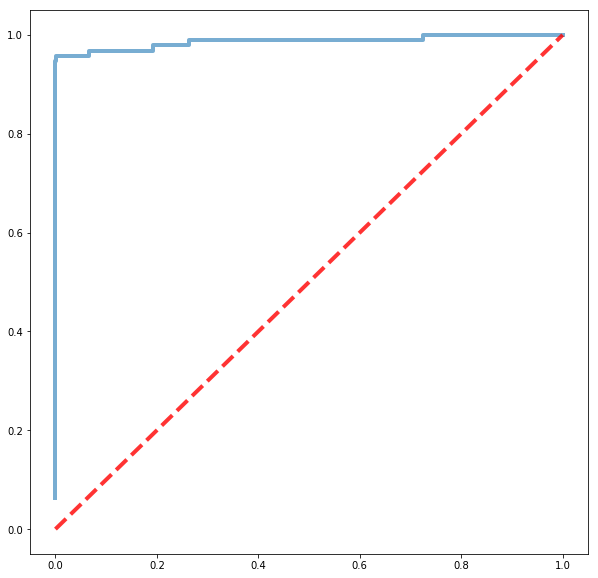

In [86]:
from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
clf = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='lbfgs', 
                         class_weight={0:1,1:20},
                         max_iter=100, multi_class='ovr', 
                         verbose=0, n_jobs=-1)


probas_ = clf.fit(X_train,y_train).predict_proba(X_test)
predicted_ = clf.predict(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print('AUC ROC',roc_auc)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, lw = 4, alpha=0.6,
         label='(AUC = %0.2f)' % (roc_auc));
plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r',
         label='Chance', alpha=.8);

In [63]:
implabel = ['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Single Epithelial Cell Size',
 'Bare Nuclei']
X = df[implabel]
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.reset_index(inplace = True, drop = True);
X_test.reset_index(inplace = True, drop = True);
y_train.reset_index(inplace = True, drop = True);
y_test.reset_index(inplace = True, drop = True);
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 12608 samples.
Testing set has 3152 samples.


## Random forest with Grid search

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
params = {'criterion': ['entropy'], 'class_weight':[{0:1,1:20}, {0: 1, 1: 10}],
          'n_estimators': [100,150],
          'max_features': ['sqrt'], 
          'max_depth': [6,7,8],
          'bootstrap': [False], 
          'warm_start':[False]}


rforest = RandomForestClassifier(random_state=0)
scorer = make_scorer(roc_auc_score)
rforest_grid = GridSearchCV(rforest, 
                                  params, 
                                  cv=StratifiedKFold(n_splits=7, shuffle=True),
                                  scoring=scorer,
                                  n_jobs = -1,
                                  verbose=3)
rforest_grid.fit(X_train, y_train)
best_rforest_est = rforest_grid.best_estimator_
print(best_rforest_est)

y_pred = best_rforest_est.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False 
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False 
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False 
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False, score=0.9794288977727013, total=   1.2s
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, warm_start=False, score=0.97, total=   1.2s
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.6s


[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=150, warm_start=False, score=0.9897144488863506, total=   1.8s
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=150, warm_start=False, score=0.97, total=   1.7s
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=150, warm_start=False, score=1.0, total=   1.8s
[CV] bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 20}, criterion=entropy, max_depth=8, m

[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, warm_start=False, score=0.97, total=   2.1s
[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, warm_start=False, score=0.9797144488863506, total=   1.9s
[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, warm_start=False, score=1.0, total=   2.4s
[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=7, ma

[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False, score=0.9994288977727013, total=   2.7s
[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False, score=0.9697144488863506, total=   2.0s
[CV] bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False 
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=150, warm_start=False, score=0.9897144488863506, total=   1.9s
[CV]  bootstrap=False, class_weight={0: 1, 1: 10}, crit

[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   49.2s finished


RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 10},
            criterion='entropy', max_depth=7, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.99      0.95      0.97        95
          1       1.00      1.00      1.00      3057

avg / total       1.00      1.00      1.00      3152



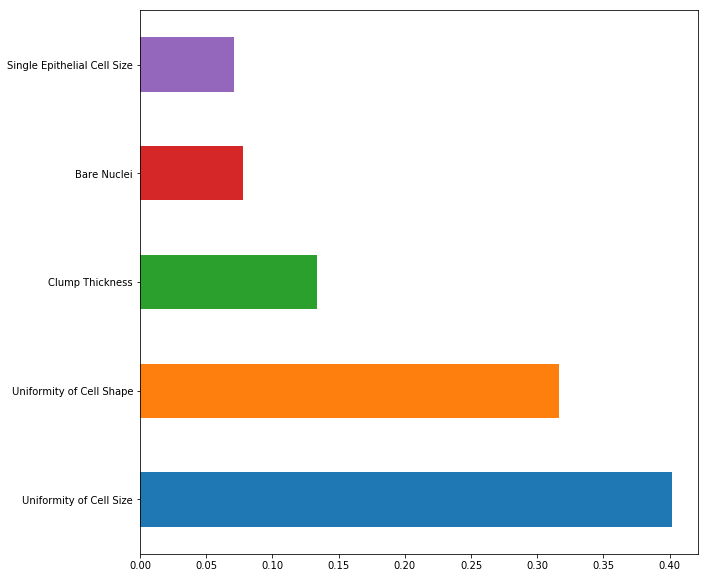

In [87]:
feat_importances = pd.Series(best_rforest_est.feature_importances_, index=X_test.columns)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
feat_importances.nlargest(20).plot(kind='barh');

AUC ROC 0.9955150388237521
             precision    recall  f1-score   support

          0       0.99      0.95      0.97        95
          1       1.00      1.00      1.00      3057

avg / total       1.00      1.00      1.00      3152

Confusion Matrix
 [[  90    5]
 [   1 3056]]


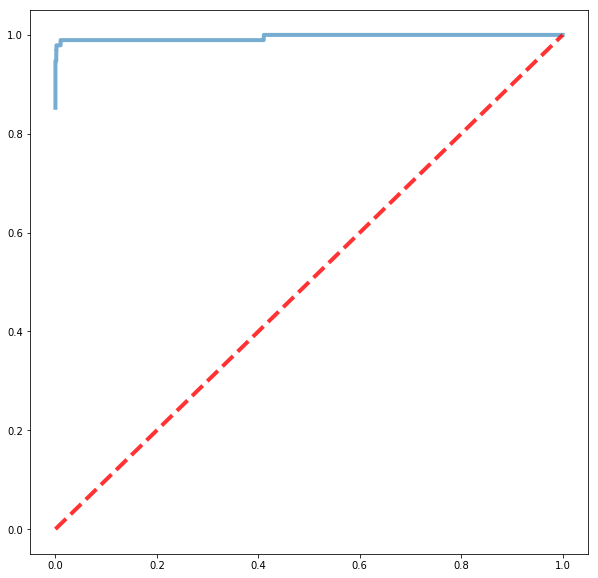

In [88]:
probas_ = best_rforest_est.predict_proba(X_test)
predicted_ = best_rforest_est.predict(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, lw = 4, alpha=0.6,
         label='(AUC = %0.2f)' % (roc_auc));
plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r',
         label='Chance', alpha=.8);

from sklearn.metrics import classification_report
y_pred = best_rforest_est.predict(X_test)
print('AUC ROC',roc_auc)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))

In [76]:
roc_auc

0.9955425856102473